In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


## Preparation and Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738120 entries, 0 to 8738119
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 600.0+ MB


In [5]:
df.event_time = pd.to_datetime(df['event_time'])
df["event_date"] = df["event_time"].dt.date
df['event_time'] = df['event_time'].dt.strftime('%H:%M:%S')

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
0,00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
1,00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
2,00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01
3,00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
4,00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01


## Analysis

## Which products to feature in the next advertising campaigns and promotions?
- The best products to feature in the next campaigns and promotions are the top products customers add to their cart with or without purchasing.
- We will also get the top products put in cart by customers without purchasing them to advertise them mostly.
<br>

**Note** The item purchased also has a record for being put in cart, so for analysing the products put on cart only without purchasing we have to exclude the ones that have a purchased record.

In [7]:
df.event_type.value_counts()

view                3938296
cart                2544192
remove_from_cart    1687591
purchase             568041
Name: event_type, dtype: int64

In [8]:
df[df.event_type=='purchase']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
202,00:06:35,purchase,5619862,1487580006895846315,NaN,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01
204,00:06:35,purchase,5619866,1487580006895846315,NaN,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01
205,00:06:35,purchase,5696184,1487580005134238553,NaN,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01
206,00:06:35,purchase,5706784,1487580005092295511,NaN,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01
207,00:06:35,purchase,5723503,1487580005134238553,NaN,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01
...,...,...,...,...,...,...,...,...,...,...
8737121,23:24:54,purchase,5802427,1487580008187692007,NaN,NaN,0.79,519606434,dd1ee443-79ba-48b9-a813-606a7d4e9e2c,2019-11-30
8737122,23:24:54,purchase,5802432,1487580009286598681,NaN,NaN,0.32,519606434,dd1ee443-79ba-48b9-a813-606a7d4e9e2c,2019-11-30
8737123,23:24:54,purchase,5809323,1487580007675986893,NaN,bpw.style,1.27,519606434,dd1ee443-79ba-48b9-a813-606a7d4e9e2c,2019-11-30
8737124,23:24:54,purchase,5833325,1487580007675986893,NaN,bpw.style,1.59,519606434,dd1ee443-79ba-48b9-a813-606a7d4e9e2c,2019-11-30


In [9]:
df[(df.product_id==5809323) & (df.user_id==519606434)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
7938967,14:11:37,cart,5809323,1487580007675986893,NaN,bpw.style,1.27,519606434,27b0bff7-eef0-4b28-9b09-559df64a4630,2019-11-26
8737123,23:24:54,purchase,5809323,1487580007675986893,NaN,bpw.style,1.27,519606434,dd1ee443-79ba-48b9-a813-606a7d4e9e2c,2019-11-30


### Which product to put pormotions on based on the top products people put in cart or purchase?

In [10]:
df_cart = df[df.event_type=='cart']

In [11]:
df_cart.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
0,00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
1,00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
2,00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01
3,00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01
4,00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01


In [16]:
top_30_products_cart = df_cart.groupby('product_id')['user_id'].count().sort_values(ascending=False)[:30]
top_30_products_cart

product_id
5700037    11681
5802432    10625
5854897    10049
5809910     8705
5686925     7426
5815662     7180
5700046     6552
5751422     5418
5836522     5082
5809912     4907
5304        4888
5751383     4858
5700035     4746
5849033     4507
5792800     4359
5688124     3989
5843836     3930
5809911     3478
5833330     3323
5700039     3041
5528035     2915
5565820     2886
5585656     2867
5816170     2856
5833325     2748
5833334     2636
5817702     2623
5833326     2587
5700047     2537
5773361     2432
Name: user_id, dtype: int64

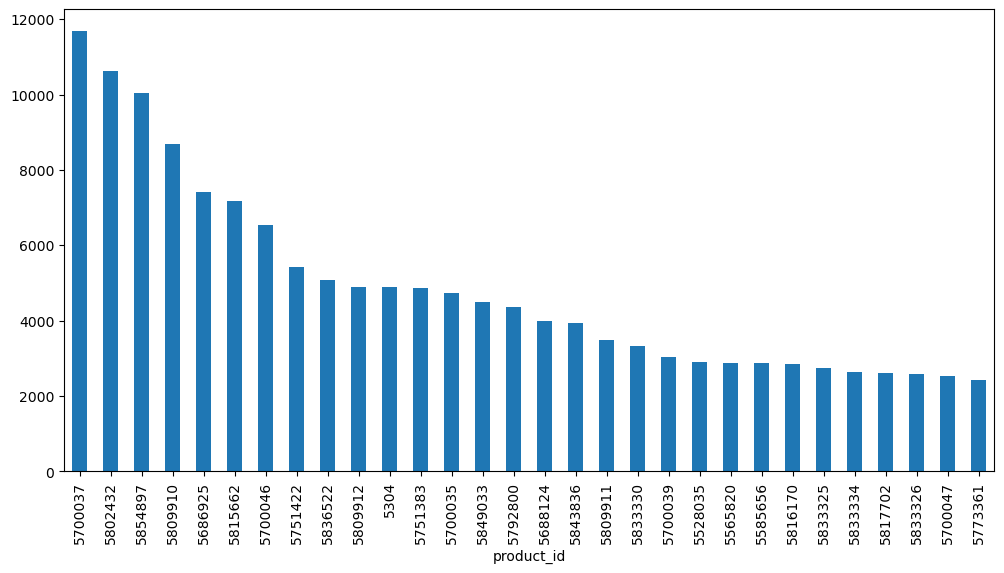

In [17]:
top_30_products_cart.plot.bar(figsize=(12,6));

### Which product to put pormotions on based on the top products people put in cart and don't purchase?

In [18]:
df_purchased = df[df.event_type=='purchase']

In [19]:
cart_purchase = df_cart.merge(df_purchased, how='left', on=['product_id', 'user_id'], indicator=True)

In [20]:
cart_only = cart_purchase[cart_purchase['_merge'] == 'left_only']
cart_only = cart_only.iloc[:,:10]
cart_only.columns = df_cart.columns

In [21]:
cart_only.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
4,00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01
5,00:00:16,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f,2019-10-01
6,00:00:19,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733,2019-10-01
8,00:00:25,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694,2019-10-01
12,00:00:48,cart,5859414,1487580005671109489,NaN,masura,2.37,555442940,618f3d7d-2939-47ea-8f1d-07a4f97d0fe2,2019-10-01


In [24]:
top_30_products_cart_not_purchased = cart_only.groupby('product_id')['user_id'].count().sort_values(ascending=False)[:30]
top_30_products_cart_not_purchased

product_id
5809910    5490
5700037    5336
5802432    5144
5854897    4851
5815662    4145
5686925    3825
5809912    3428
5751422    3375
5751383    3146
5304       2862
5792800    2669
5849033    2649
5809911    2599
5700046    2365
5836522    2363
5816170    2081
5688124    2057
5833330    1989
5833334    1919
5773361    1861
5833325    1837
5528035    1806
5585656    1795
5833326    1740
5843836    1732
5841799    1541
5013       1538
5700039    1532
5809297    1478
5848909    1474
Name: user_id, dtype: int64

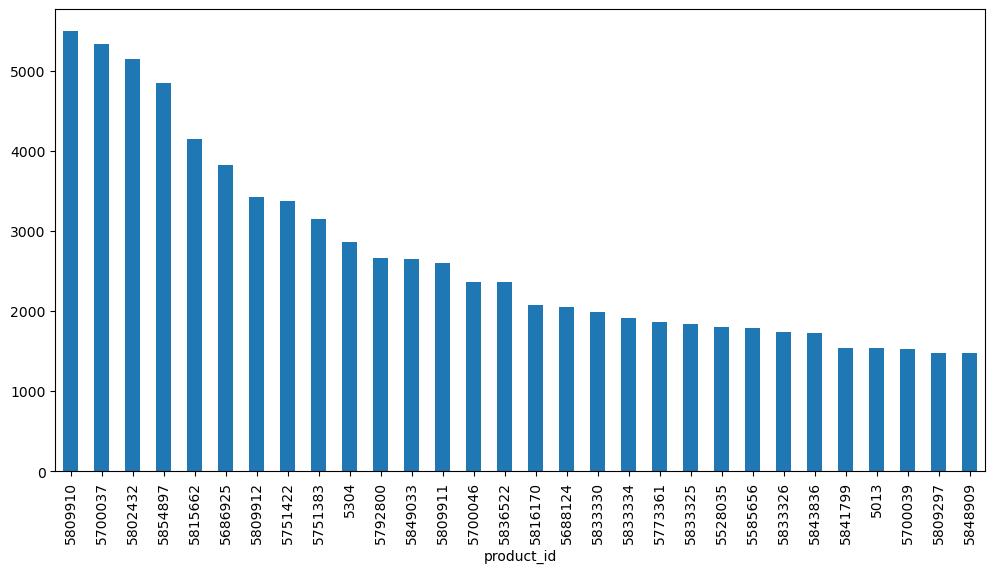

In [25]:
top_30_products_cart_not_purchased.plot.bar(figsize=(12,6));

## Which brands are customers most loyal to?
- We will first see which brands does people buy the most.
- Then we will calculate the total purchases made by each customer for each brand.
- Then we will Calculate the average purchase amount for each brand.
- Finally, we will Sort the brands by the average purchase amount in descending order to see which brand has the highest customer loyalty.

Calculating the most purchased brands is different than calculating the brands that customers are most loyal to.

When calculating the most purchased brands, you are simply looking at the total number of purchases made for each brand. This metric may not necessarily indicate customer loyalty since a customer may purchase a brand's product once or twice but may not necessarily be loyal to that brand.

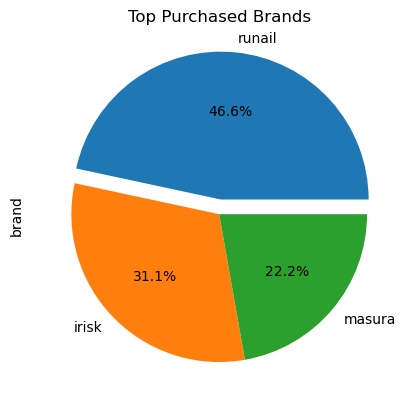

In [35]:
df_purchased['brand'].value_counts().sort_values(ascending=False)[:3].plot.pie(title="Top Purchased Brands", legend=False, autopct='%1.1f%%', explode=(0.1, 0, 0));

On the other hand, when calculating the brands that customers are most loyal to, you are looking at the average purchase amount for each brand per customer. This metric takes into account how much each customer spends on a particular brand over time, which indicates a higher level of customer loyalty.

In [34]:
brand_customer_totals = df_purchased.groupby(['brand', 'user_id'])['price'].count()
pd.DataFrame(brand_customer_totals)

price
brand    user_id         
airnails 10280338       1
         105697630      1
         126051562      2
         149936015      1
         160905182      2
...                   ...
zinger   579632103      1
         579681799     10
         579750441      1
         579849574      1
         579866859      1

[151243 rows x 1 columns]

In [28]:
brand_averages = brand_customer_totals.groupby('brand').mean()
brand_averages

brand
airnails      3.904357
almea         1.214286
andrea        1.000000
ardell        1.388430
art-visage    1.350500
                ...   
yoko          1.315581
ypsed         1.162162
yu-r          1.035714
zeitun        1.849711
zinger        1.387925
Name: price, Length: 218, dtype: float64

In [29]:
brand_loyality = brand_averages.sort_values(ascending=False)
brand_loyality

brand
airnails     3.904357
masura       3.669184
bpw.style    3.500700
kinetics     3.078431
runail       2.856334
               ...   
coifin       1.000000
sun          1.000000
neoleor      1.000000
juno         1.000000
koreatida    1.000000
Name: price, Length: 218, dtype: float64

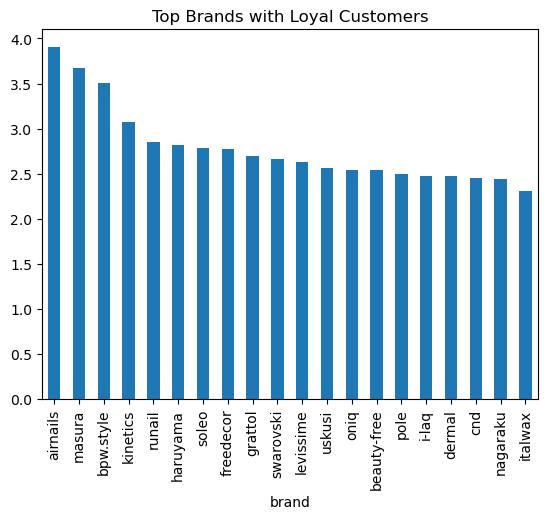

In [39]:
brand_loyality[:20].plot.bar(title="Top Brands with Loyal Customers");

In [40]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'event_date'],
      dtype='object')

### Are there any categories that are underperforming?
- We will group the data by category_id and calculate the total revenue for each category.
- Calculate the overall revenue for all categories.
- Calculate the percentage of revenue for each category.
- Determine which categories have a percentage of revenue that is lower than the overall average.
- Visualize the underperforming categories and their percentage of revenue.

category_id
1487580013564788937    0.000119
1805953965678920077    0.000255
1783999064170299632    0.000260
1487580011383750769    0.000290
1487580005318787937    0.000347
                         ...   
1487580008984608779    0.207133
1487580013506068678    0.211342
1891434351850160381    0.217713
1487580013858390233    0.219828
2195085255034011676    0.224257
Name: price, Length: 344, dtype: float64


<AxesSubplot: title={'center': 'Most Underperforming Categories'}, ylabel='category_id'>

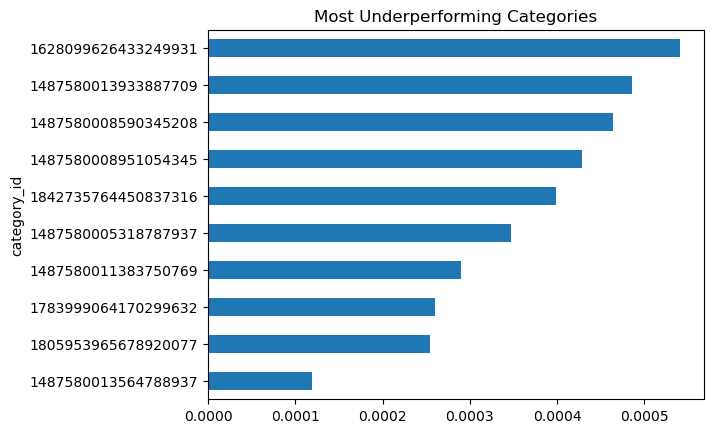

In [53]:
category_revenue = df_purchased.groupby('category_id')['price'].sum()
total_revenue = df_purchased['price'].sum()
category_percentage = category_revenue / total_revenue * 100
underperforming_categories = category_percentage[(category_percentage < category_percentage.mean()) & (category_percentage > 0)].sort_values(ascending=True)
print(underperforming_categories)
underperforming_categories[:10].plot.barh(title="Most Underperforming Categories")

### Are there any products that are frequently purchased together?
- We can find out using Apriori algorithm and association rules.

- **Apriori Algorithm has three parts** pd.get_dummies(df_purchased1['product_id'])
    1. Support --> Support( I ) = ( Number of transactions containing item I ) / ( Total number of transactions )
    2. Confidence --> Confidence( I1 -> I2 ) = ( Number of transactions containing I1 and I2 ) / ( Number of transactions containing I1 )
    3. Lift --> Lift( I1 -> I2 ) = ( Confidence( I1 -> I2 ) / ( Support(I2) )
    d.get_dummies(df_purchased1['product_id'])
    <br>
    
- **Priori algorithm's Steps**
    1. Set a minimum support and confidence.
    2. Take all the subset present in the transactions which have higher support than minimum support.
    3. Take all the rules of these subsets which have higher confidence than minimum confidence.
    4. Sort the rules by decreasing lift.
    
    <br>
    
- The lift means that there is lift% chance that the customers who buy I1 are likely to buy I2.

In [108]:
basket

product_id,5395,8372,8373,24330,24331,24332,24333,24334,24335,24336,...,5901870,5901871,5901872,5901873,5901987,5902675,5904212,5905638,5907079,5907080
user_session,,,,,,,,,,,,,,,,,,,,,
000a5db1-3002-4ede-82de-242c1c68dc64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000f9933-fcdb-23be-1ab7-94c29fb834ae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001c34fe-95d7-48e5-aa4b-d98708d548fc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00212299-8eb6-4035-a1ed-cd6a3502b7ae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002dc972-d167-429c-90fe-c6dbe76b9fbb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd66b4b-4e12-4658-8dbb-864703430edf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffd8e1ff-eb10-4f66-be90-454c1a58dfda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffe2ee5c-2b63-46f8-b7bd-090e9f0b4966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Avoiding the modification the original df_purchased
df_purchased1 = df_purchased.copy()

# Dropping missing values
df_purchased1.dropna(inplace=True)

# Create a one-hot encoded matrix of the product IDs then converting it to boolean for better performance
#df_purchased.groupby('user_sessionn')['product_id'].count()
basket = df_purchased.groupby(['user_session','product_id'])['product_id'].count().unstack().reset_index().fillna(0).set_index('user_session')
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
basket = basket.applymap(hot_encode)

# Calculate the itemsets using the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.03)

# Filter the rules to show only those with a high lift value
rules = rules[rules['lift'] > 0]

# Print the top 10 frequently purchased product combinations
final_df = rules.sort_values('lift', ascending=False)
final_df

C:\Users\user\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5743974),(5749198),0.041944,0.044757,0.011509,0.274390,6.130662,0.009632,1.316469
1,(5749198),(5743974),0.044757,0.041944,0.011509,0.257143,6.130662,0.009632,1.289691
14,(5766980),(5788783),0.075448,0.029668,0.011253,0.149153,5.027469,0.009015,1.140431
15,(5788783),(5766980),0.029668,0.075448,0.011253,0.379310,5.027469,0.009015,1.489557
10,(5775814),(5749199),0.036829,0.072379,0.012788,0.347222,4.797311,0.010122,1.421037
11,(5749199),(5775814),0.072379,0.036829,0.012788,0.176678,4.797311,0.010122,1.169860
13,(5775814),(5766980),0.036829,0.075448,0.013043,0.354167,4.694209,0.010265,1.431565
12,(5766980),(5775814),0.075448,0.036829,0.013043,0.172881,4.694209,0.010265,1.164490
9,(5749199),(5766980),0.072379,0.075448,0.022762,0.314488,4.168294,0.017301,1.348703
8,(5766980),(5749199),0.075448,0.072379,0.022762,0.301695,4.168294,0.017301,1.328390


Apparently, we don't have enough association in our data to detect that some categories may be bought together.

### How does pricing affect sales of different products?

In [70]:
product_revenue = df_purchased.groupby('product_id')['price'].sum().reset_index()
product_revenue = product_revenue.rename(columns={'price': 'revenue'})
product_revenue

,product_id,revenue
0,5395,725.13
1,8372,148.35
2,8373,62.33
3,24330,151.24
4,24331,137.98
...,...,...
229,5902675,25.01
230,5904212,58.30
231,5905638,2.59
232,5907079,136.20


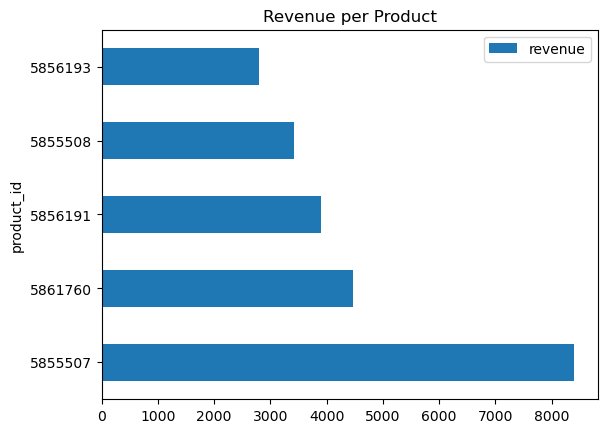

In [128]:
product_revenue.set_index('product_id').sort_values(by='revenue',ascending=False)[:5].plot.barh(title='Revenue per Product');

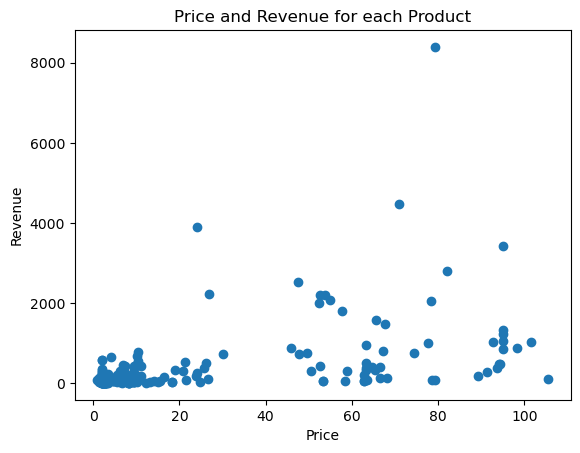

In [126]:
# Group the data by product_id and calculate the total revenue for each product
product_revenue = df_purchased.groupby('product_id')['price'].sum().reset_index()
product_revenue = product_revenue.rename(columns={'price': 'revenue'})

# Group the data by product_id and calculate the average price for each product
product_price = df_purchased.groupby('product_id')['price'].mean().reset_index()

# Merge the revenue and price dataframes on product_id
product_data = pd.merge(product_revenue, product_price, on='product_id')

# Create a scatter plot to show the relationship between price and revenue
plt.scatter(x='price', y='revenue', data=product_data)
plt.title('Price and Revenue for each Product')
plt.xlabel('Price')
plt.ylabel('Revenue');

In [116]:
import statsmodels.api as sm

# Fit a linear regression model to the data
model = sm.formula.ols('revenue ~ price', data=product_data).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     69.10
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           7.91e-15
Time:                        10:00:52   Log-Likelihood:                -1872.3
No. Observations:                 234   AIC:                             3749.
Df Residuals:                     232   BIC:                             3756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7092     59.038      1.113      0.2

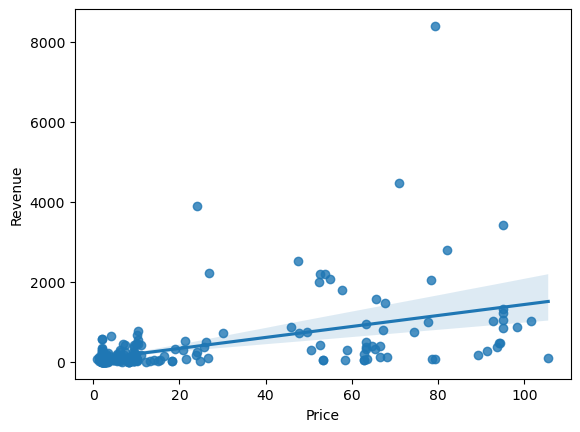

In [118]:
# Create a scatter plot with regression line
sns.regplot(x='price', y='revenue', data=product_data)

plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()